 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [57]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [58]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [60]:
train = train.sample(10000)

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.EDA ( Exploratory Data Analysis)</p>

#### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A1.Reading Data</p>

In [128]:
train.tail()

id class  cap-diameter cap-shape cap-surface cap-color  \
1842911  1842911     p          4.23         c           k         y   
468568    468568     e          3.58         f           s         w   
2816992  2816992     p          1.79         o           k         n   
1603371  1603371     e          3.03         s         NaN         n   
2740381  2740381     e          4.30         f           h         g   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
1842911                    t               x            c          p   
468568                     f               d            d          w   
2816992                    f             NaN          NaN          n   
1603371                    f               f            f          f   
2740381                    f               s            d          g   

         stem-height  stem-width stem-root stem-surface stem-color veil-type  \
1842911         4.92       11.52       NaN          NaN          w       NaN   
468568          3.82        5.85       NaN          NaN          w       NaN   
2816992         4.31        1.39       NaN          NaN          n       NaN   
1603371         6.98        7.88       NaN          NaN          o       NaN   
2740381         4.93        9.02       NaN            s          g       NaN   

        veil-color has-ring ring-type spore-print-color habitat season  
1842911        NaN        f         f               NaN       d      s  
468568         NaN        f         f               NaN       m      a  
2816992        NaN        f         f               NaN       d      u  
1603371        NaN        f         f               NaN       d      a  
2740381        NaN        f         f               NaN       d      a

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A2.Data Size</p>

In [85]:
train.shape

(10000, 22)

In [86]:
print(f'{train.memory_usage().sum()/(1000000)} MB')

1.84 MB


 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A3.Data Types</p>

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1643505 to 2705215
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   class                 10000 non-null  object 
 2   cap-diameter          10000 non-null  float64
 3   cap-shape             10000 non-null  object 
 4   cap-surface           7852 non-null   object 
 5   cap-color             10000 non-null  object 
 6   does-bruise-or-bleed  10000 non-null  object 
 7   gill-attachment       8238 non-null   object 
 8   gill-spacing          6012 non-null   object 
 9   gill-color            10000 non-null  object 
 10  stem-height           10000 non-null  float64
 11  stem-width            10000 non-null  float64
 12  stem-root             1135 non-null   object 
 13  stem-surface          3596 non-null   object 
 14  stem-color            10000 non-null  object 
 15  veil-type       

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A4.Summary Statistics</p>

In [ ]:
train.describe()

In [88]:
train['class'].unique()

array(['p', 'e'], dtype=object)

In [89]:
# value count of target classes
classes = train['class'].value_counts()
classes.reset_index()

class  count
0     p   5469
1     e   4531

<Axes: xlabel='class', ylabel='count'>

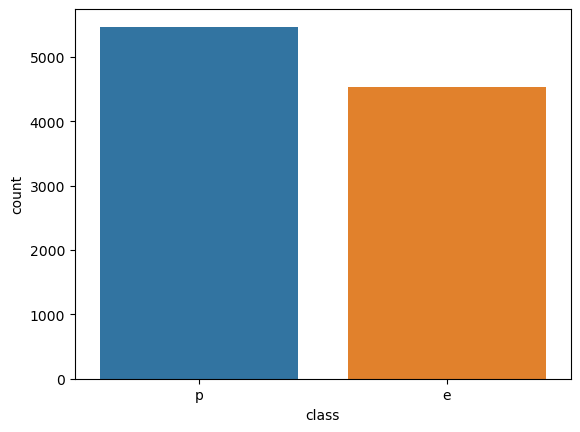

In [90]:
sns.countplot(x='class',data=train)

In [91]:
# donut plot visualization of target class : e - edible , p - poisonous
fig = go.Figure(data=[go.Pie(labels=['Poisonous','Edible'], values=classes.values,hole = .4,marker = dict(colors = ['red','green']))])
fig.update_layout(title_text='Classes of Mushroom')
fig.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem">Correlation Matrics</p> 

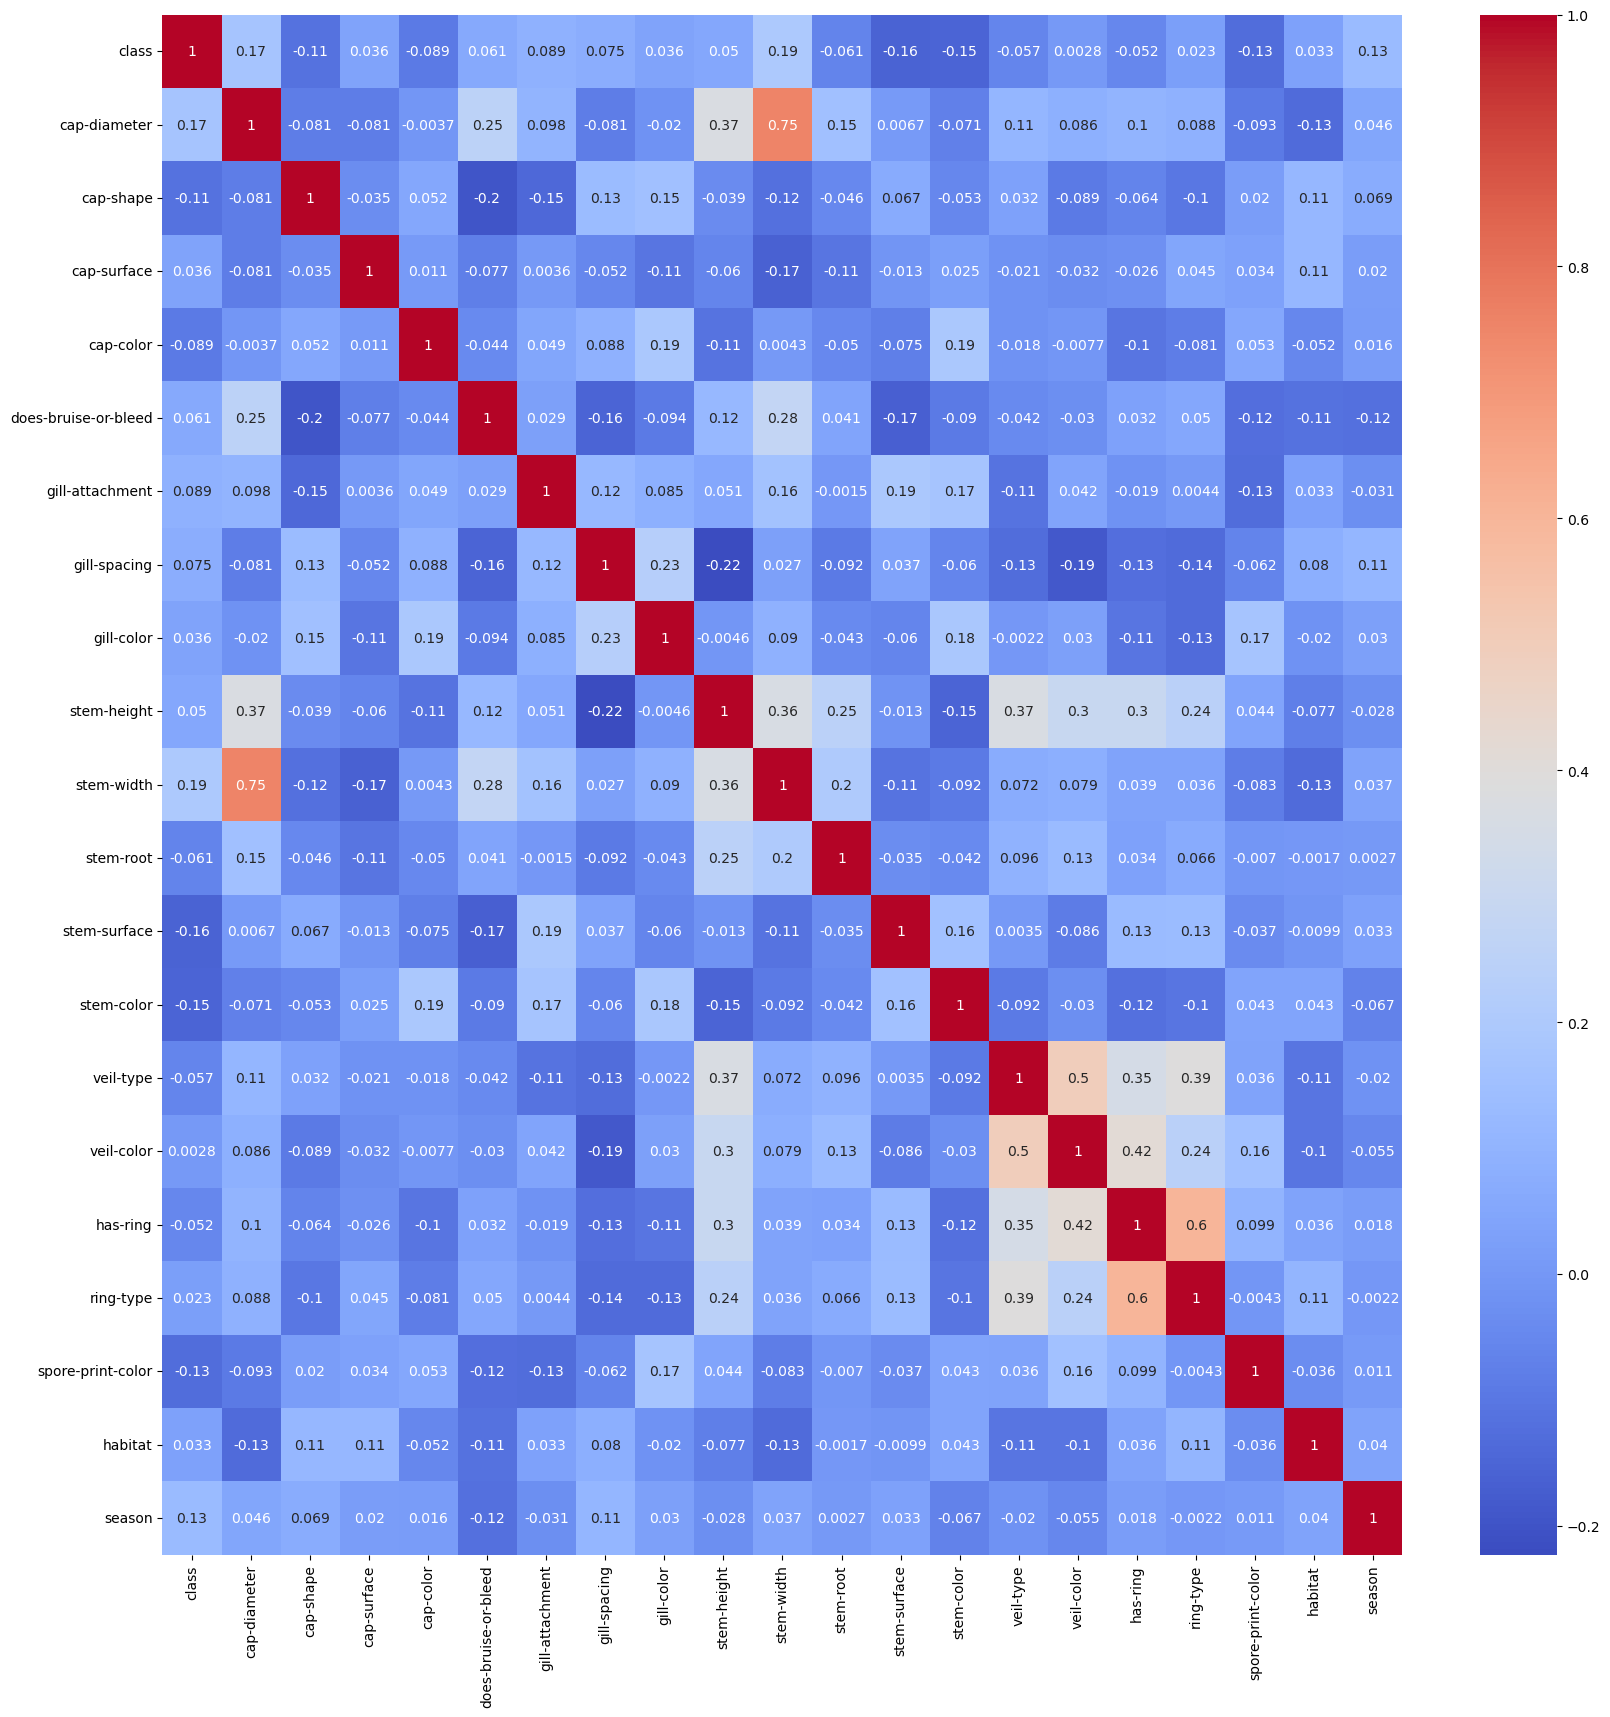

In [8]:
plt.figure(figsize=(20,20))
temp=train.dropna()
temp=train.drop('id',axis=1)
temp=temp.apply(lambda x : pd.factorize(x)[0] if x.dtype=='object'else x)
sns.heatmap(temp.corr(),annot=True,cmap='coolwarm')
plt.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Data Pre-processing</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B1.Missing Values</p>

In [61]:
# standardizing the Missing Data with null values to make it easier to handle
train= train.fillna(np.nan)
test = test.fillna(np.nan)

In [62]:
train.isnull().sum().sort_values(ascending=False)

veil-type               9453
spore-print-color       9099
stem-root               8814
veil-color              8763
stem-surface            6365
gill-spacing            3991
cap-surface             2144
gill-attachment         1687
ring-type                437
id                         0
habitat                    0
has-ring                   0
stem-color                 0
stem-width                 0
class                      0
stem-height                0
gill-color                 0
does-bruise-or-bleed       0
cap-color                  0
cap-shape                  0
cap-diameter               0
season                     0
dtype: int64

In [63]:
def null_percent(df):
    per=((df.isnull().sum()/len(df))*100).round(5)
    per.sort_values(ascending=False,inplace =True)
    return per
print("Nan Values in train data:")
print(null_percent(train))

print("Nan Values in test data:")
print(null_percent(test))

Nan Values in train data:
veil-type               94.53
spore-print-color       90.99
stem-root               88.14
veil-color              87.63
stem-surface            63.65
gill-spacing            39.91
cap-surface             21.44
gill-attachment         16.87
ring-type                4.37
id                       0.00
habitat                  0.00
has-ring                 0.00
stem-color               0.00
stem-width               0.00
class                    0.00
stem-height              0.00
gill-color               0.00
does-bruise-or-bleed     0.00
cap-color                0.00
cap-shape                0.00
cap-diameter             0.00
season                   0.00
dtype: float64
Nan Values in test data:
veil-type               94.87869
spore-print-color       91.41722
stem-root               88.45254
veil-color              87.88044
stem-surface            63.59533
gill-spacing            40.40469
cap-surface             21.50682
gill-attachment         16.83480
ring-type 

In [64]:
Missing = train.isna().mean()*100 # percentage of missing columns
High_missing_columns = Missing[Missing>60]
High_missing_columns.reset_index() 
High_missing_columns.sort_values(ascending=False,inplace =True)
High_missing_columns

veil-type            94.53
spore-print-color    90.99
stem-root            88.14
veil-color           87.63
stem-surface         63.65
dtype: float64

In [65]:
colums_to_drop = train.columns[Missing>60]
colums_to_drop

Index(['stem-root', 'stem-surface', 'veil-type', 'veil-color',
       'spore-print-color'],
      dtype='object')

In [66]:
train= train.drop(columns = colums_to_drop) 
test = test.drop(columns = colums_to_drop)

#### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B2.Remove Duplicates and Unnecessary Columns</p>

In [67]:
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

In [68]:
print("There are {} duplicates in train dataset.".format(train.duplicated().sum()))
print("There are {} duplicates in test dataset.".format(test.duplicated().sum()))

There are 0 duplicates in train dataset.
There are 218 duplicates in test dataset.


In [14]:
test.loc[test.duplicated()].sort_values('cap-diameter')

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
1609634          0.58         x           g         e                    f   
1967686          0.58         f         NaN         o                    f   
1490756          0.61         x         NaN         o                    f   
1255147          0.62         x           g         p                    f   
1996068          0.62         x           g         o                    f   
...               ...       ...         ...       ...                  ...   
2074042         11.83         x         NaN         n                    f   
1934817         12.05         f         NaN         g                    f   
785558          14.45         x           y         n                    t   
1967744         15.14         x           y         n                    t   
1836006         15.39         x           e         n                    t   

        gill-attachment gill-spacing gill-color  stem-height  stem-width  \
1609634               a          NaN          n         3.93        0.95   
1967686               d          NaN          o         3.57        0.95   
1490756               d          NaN          o         3.91        0.93   
1255147               a          NaN          n         3.91        0.96   
1996068             NaN          NaN          y         3.44        0.63   
...                 ...          ...        ...          ...         ...   
2074042               p          NaN          w        10.89       33.03   
1934817               e          NaN          w        10.92       14.94   
785558                e          NaN          w         9.50       16.77   
1967744               e          NaN          w         9.67       17.12   
1836006               e          NaN          w        10.12       17.95   

        stem-color has-ring ring-type habitat season  
1609634          k        f         f       d      a  
1967686          y        f         f       g      a  
1490756          y        f         f       g      a  
1255147          k        f         f       d      w  
1996068          w        f         f       d      u  
...            ...      ...       ...     ...    ...  
2074042          n        f         f       d      a  
1934817          w        t         g       d      a  
785558           w        t       NaN       g      a  
1967744          w        t       NaN       g      a  
1836006          w        t       NaN       d      u  

[218 rows x 15 columns]

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B4.Convert Types (Downcasting)</p>

In [69]:
def convert_types (df):
    object_to_categorical = df.select_dtypes(include=['object'])
    numerical_int = df.select_dtypes(include=['int64'])
    numerical_float = df.select_dtypes(include=['float64'])
    
    for i in object_to_categorical:
         df[i] = df[i].astype('category')
    for i in numerical_int:
         df[i] = df[i].astype('int32')  
    for i in numerical_float:
         df[i] = df[i].astype('float32') 
    return df

train = convert_types(train)
test = convert_types(test)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1759676 to 109821
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 10000 non-null  category
 1   cap-diameter          10000 non-null  float32 
 2   cap-shape             10000 non-null  category
 3   cap-surface           7856 non-null   category
 4   cap-color             10000 non-null  category
 5   does-bruise-or-bleed  10000 non-null  category
 6   gill-attachment       8313 non-null   category
 7   gill-spacing          6009 non-null   category
 8   gill-color            10000 non-null  category
 9   stem-height           10000 non-null  float32 
 10  stem-width            10000 non-null  float32 
 11  stem-color            10000 non-null  category
 12  has-ring              10000 non-null  category
 13  ring-type             9563 non-null   category
 14  habitat               10000 non-null  category
 15  

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B5.Aggregate Categorical and Numerical</p>

In [71]:
# checking number of unique values in each column
print("Number of unique values in each column : \n")
for col in train.columns:
    print(f"{col} : {train[col].nunique()} unique values")

Number of unique values in each column : 

class : 2 unique values
cap-diameter : 1553 unique values
cap-shape : 9 unique values
cap-surface : 13 unique values
cap-color : 12 unique values
does-bruise-or-bleed : 3 unique values
gill-attachment : 7 unique values
gill-spacing : 3 unique values
gill-color : 13 unique values
stem-height : 1247 unique values
stem-width : 2521 unique values
stem-color : 14 unique values
has-ring : 2 unique values
ring-type : 11 unique values
habitat : 10 unique values
season : 4 unique values


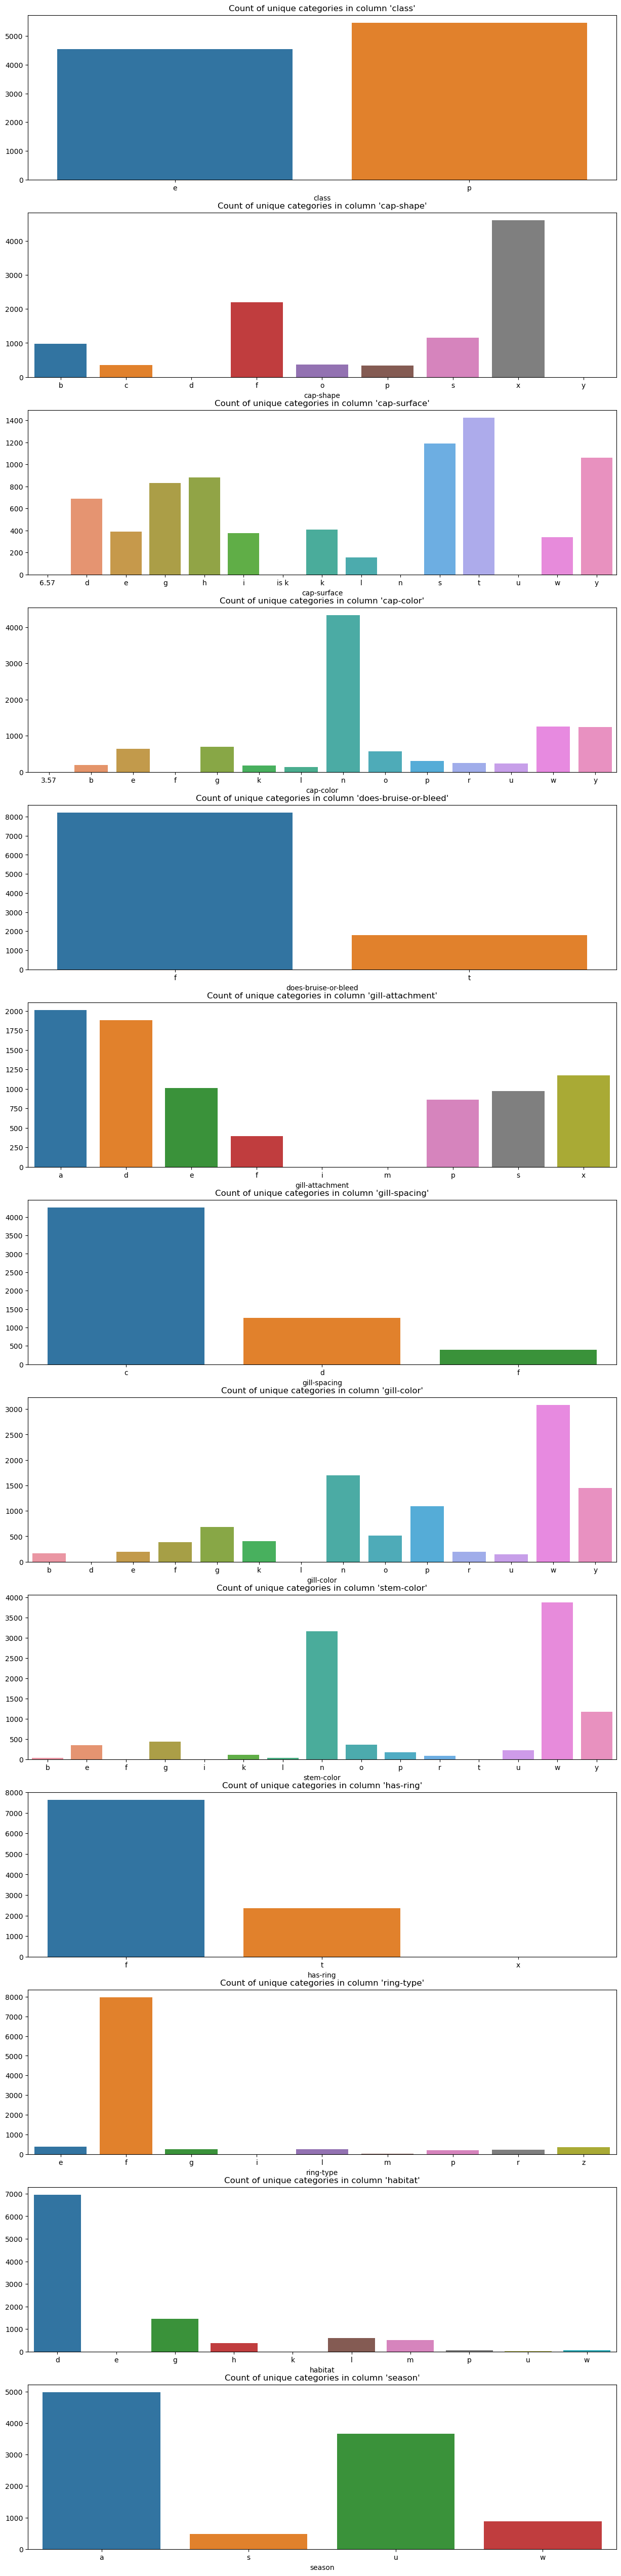

In [18]:
def count_cat(df):
    cat_col=df.select_dtypes(include=['category']).columns
    uni_col={col: df[col].value_counts() for col in cat_col}
    plt.figure(figsize=(15,len(cat_col)*5))
    for i ,(col,count) in enumerate(uni_col.items(),1):
        plt.subplot(len(cat_col),1,i)
        sns.barplot(x=count.index,y=count.values)
        plt.title(f"Count of unique categories in column '{col}'")
    plt.show()
count_cat(train)

In [19]:
categorical_columns_2 =train.select_dtypes(include = 'object').columns
numerical_columns_2 = train.select_dtypes(exclude = 'object').columns

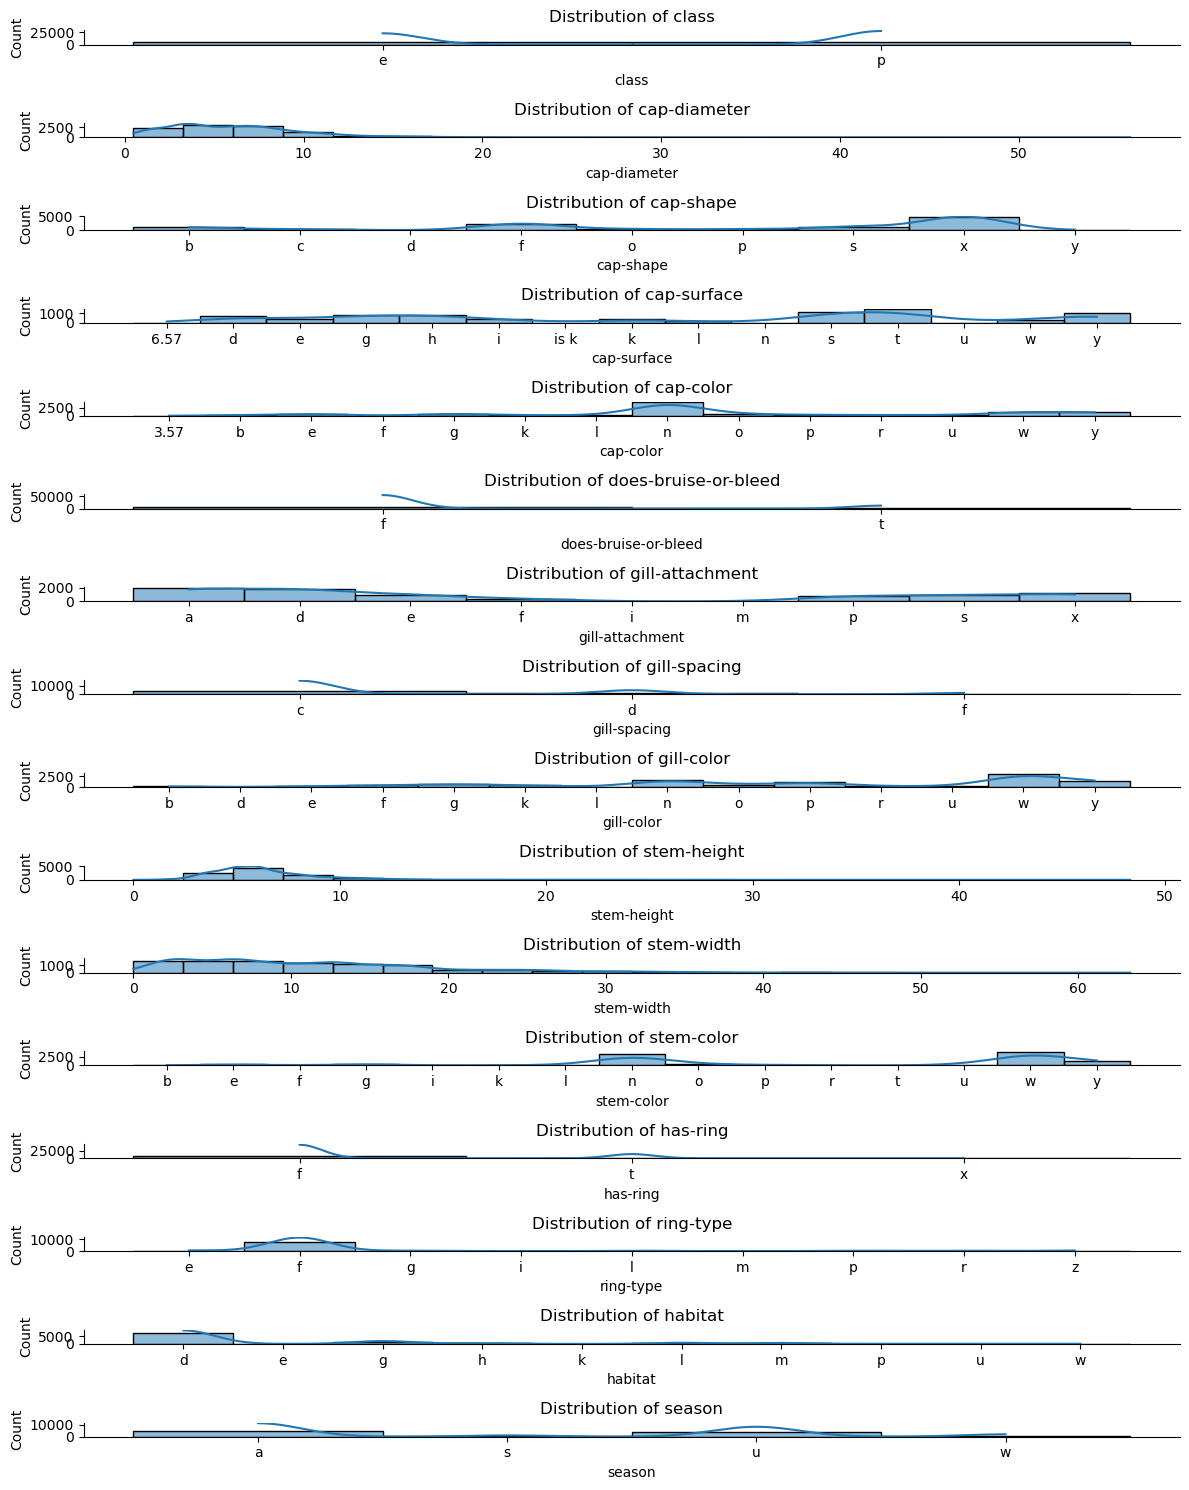

In [20]:
plt.figure(figsize=(12, 15))  

for i, column in enumerate(numerical_columns_2, 1):
    plt.subplot(len(numerical_columns_2), 1, i)
    sns.histplot(data=train, x=column, kde=True, bins=20)
    sns.despine()
    plt.title(f'Distribution of {column}')

plt.tight_layout()  
plt.show()

In [72]:
X.isnull().sum()

cap-diameter               0
cap-shape                  0
cap-surface             2257
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         1702
gill-spacing            4095
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type                376
habitat                    0
season                     0
dtype: int64

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Data Processing</p>

In [24]:
from sklearn.preprocessing import LabelEncoder

In [73]:
X = train.drop(columns=['class']).copy()
y = train['class']

In [74]:
label=LabelEncoder()
y=label.fit_transform(y)
y = y.astype('int16')
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int16)

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score, cross_val_predict, RepeatedKFold


from sklearn.ensemble import RandomForestRegressor

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Model Training</p>

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=42)

In [ ]:
X.info()

In [30]:
# Define preprocessing steps
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int8','int16','int32','int64','float32','float64']]

categorical_cols_2 = [cname for cname in X_train.columns if X_train[cname].nunique() >= 10 and 
                        X_train[cname].dtype == "object"]


# Preprocessing pipelines
# zastępowanie pustych wartości dla numerycznych kolumn + StandardScaler, czyli nadanie nowych wartosci w przedziale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
])
# zastępowanie pustych wartości dla object kolumn + OneHotEncoder, czyli zamiana object na inty
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('odi', OrdinalEncoder())
#     (('odi', (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = None))))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('cat_2', categorical_transformer_2, categorical_cols_2)
    ])

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A1.RandomForestRegressor</p>

In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [32]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)
                              ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

MAE: 0.27415999999999996


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">Model Evaluation</p>

In [ ]:
# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

In [38]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)

In [39]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=skf,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [0.27710625 0.27900625 0.2812625  0.2825625  0.29      ]
Average MAE score (across experiments):
0.2819875


In [53]:
def Evaluating_the_model (model, preds, X_train=X_train,y_train=y_train,X_valid=X_valid, y_valid=y_valid):
    print(f'Train Score:{model.score(X_train, y_train)}')
    print(f'Valid Score:{model.score(X_valid, y_valid)}')
    print(f'R-squared: {r2_score(y_valid, preds)}')

    print(f'Mean Absolute Error: {mean_absolute_error(y_valid, preds)}')
    print(f'Mean Squared Error: {mean_squared_error(y_valid, preds)}')   

In [54]:
Evaluating_the_model( my_pipeline, preds)

Train Score:0.9150225263429982
Valid Score:0.39907579988324415
R-squared: 0.39907579988324415
Mean Absolute Error: 0.27415999999999996


NameError: name 'mean_squared_error' is not defined

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">III.MODEL DEPLOYMENT</p>

In [ ]:
submission_RFR = pd.DataFrame({
    'id': test_ids,
    'class': predictions_RFR
})
submission_RFR['class'] = submission_RFR['class'].apply(lambda x:'e' if x<=0.5 else 'p')
# submission_RFR.to_csv('submission_RFR_001.csv', index=False)
submission_RFR.to_parquet('parquet_RFR_004.parquet', index=False)